# Airbnb Rio de Janeiro - Análise exploratória

# 1. Introdução

Este estudo tem como objetivo realizar uma Análise Exploratória de Dados (EDA) do [anúncio de imóveis do Airbnb na cidade do Rio de Janeiro](https://insideairbnb.com/get-the-data/#:~:text=Rio%20de%20Janeiro%2C%20Rio%20de%20Janeiro%2C%20Brazil). Os dados correspondem à data de 27 de Junho de 2024, correspondente à coleta de dados mais recente disponível no momento da elaboração deste estudo. 

Através desta análise, buscamos identificar variáveis que influenciam os preços, tendências e insights que possam ser úteis para ambos anfitriões e hóspedes.

## 1.1 Configurações e bibliotecas

In [21]:
import pandas as pd
from summarytools import dfSummary
from sklearn.impute import KNNImputer
from distfit import distfit
import seaborn as sns
import matplotlib.pyplot as plt
import ast

## 1.2 Dados utilizados

Dos dados disponíveis no site, utilizaremos apenas *[listings.csv.gz](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2024-06-27/data/listings.csv.gz)*. Esse arquivo contém informações detalhadas dos imóveis na cidade e período considerados.

In [2]:
df_inicial = pd.read_parquet('../data/bronze/listings_train.parquet')

## 1.3 Dicionário de dados

O dicionário de dados oficial em inglês pode ser encontrado nessa [planilha Google Sheets](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?pli=1&gid=1322284596#gid=1322284596).

| Campo                                       | Tipo     | Descrição                                                                                          |
|---------------------------------------------|----------|----------------------------------------------------------------------------------------------------|
| accommodates                                | integer  | Número máximo de hóspedes                                                                          |
| amenities                                   | text     | Lista de amenidades oferecida                                                                      |
| availability_30                             | integer  | Número de dias disponíveis nos próximos 30 dias                                                    |
| availability_365                            | integer  | Número de dias disponíveis nos próximos 365 dias                                                   |
| availability_60                             | integer  | Número de dias disponíveis nos próximos 60 dias                                                    |
| availability_90                             | integer  | Número de dias disponíveis nos próximos 90 dias                                                    |
| bathrooms                                   | float    | Número de banheiros                                                                                |
| bathrooms_text                              | text     | Descrição dos banheiros                                                                            |
| bedrooms                                    | integer  | Número de quartos                                                                                  |
| beds                                        | integer  | Número de camas                                                                                    |
| calendar_last_scraped                       | datetime | Data da última coleta no período                                                                   |
| calendar_updated                            | text     | Data da última atualização no período                                                              |
| calculated_host_listings_count              | integer  | Número calculado de anúncios do anfitrião                                                          |
| calculated_host_listings_count_entire_homes | integer  | Número calculado de anúncios de casas inteiras do anfitrião                                        |
| calculated_host_listings_count_private_rooms| integer  | Número calculado de anúncios de quartos privados do anfitrião                                      |
| calculated_host_listings_count_shared_rooms | integer  | Número calculado de anúncios de quartos compartilhados do anfitrião                                |
| description                                 | text     | Descrição do anúncio                                                                               |
| first_review                                | datetime | Data da primeira avaliação                                                                         |
| has_availability                            | boolean  | Indica se o lugar tem disponibilidade                                                              |
| host_about                                  | text     | Descrição sobre o anfitrião                                                                        |
| host_acceptance_rate                        | text     | Taxa de aceitação da hospedagem                                                                    |
| host_has_profile_pic                        | boolean  | Indica se o anfitrião possui foto de perfil                                                        |
| host_id                                     | integer  | Identificador único do anfitrião                                                                   |
| host_identity_verified                      | boolean  | Indica se a identidade do anfitrião foi verificada                                                 |
| host_is_superhost                           | boolean  | Indica se o anfitrião é um superhost                                                               |
| host_listings_count                         | integer  | Número de anúncios do anfitrião                                                                    |
| host_location                               | text     | Localização do anfitrião                                                                           |
| host_name                                   | text     | Nome do anfitrião                                                                                  |
| host_neighbourhood                          | text     | Bairro do anfitrião                                                                                |
| host_picture_url                            | text     | URL da imagem do anfitrião                                                                         |
| host_response_rate                          | text     | Taxa de resposta do anfitrião                                                                      |
| host_response_time                          | text     | Tempo de resposta do anfitrião                                                                     |
| host_since                                  | datetime | Data de cadastro do anfitrião                                                                      |
| host_thumbnail_url                          | text     | URL da imagem em miniatura do anfitrião                                                            |
| host_total_listings_count                   | integer  | Número total de anúncios do anfitrião                                                              |
| host_url                                    | text     | URL do perfil do anfitrião                                                                         |
| host_verifications                          | text     | Verificações do anfitrião                                                                          |
| id                                          | integer  | Identificador único do anúncio                                                                     |
| instant_bookable                            | boolean  | Indica se a anúncio pode ser reservada instantaneamente                                            |
| last_review                                 | datetime | Data da última avaliação                                                                           |
| last_scraped                                | datetime | UTC. A data e hora em que este anúncio foi raspado                                                 |
| latitude                                    | float    | Latitude da localidade                                                                             |
| license                                     | text     | Número da licença ou permissão para operar                                                         |
| listing_url                                 | text     | URL do anúncio                                                                                     |
| longitude                                   | float    | Longitude da localidade                                                                            |
| maximum_maximum_nights                      | integer  | Valor máximo do número máximo de noites nos próximos 365 dias                                      |
| maximum_minimum_nights                      | integer  | Valor máximo do número mínimo de noites nos próximos 365 dias                                      |
| maximum_nights                              | integer  | Número máximo de noites para estadia                                                               |
| maximum_nights_avg_ntm                      | float    | Valor máximo da média de noites nos próximos 365 dias                                              |
| minimum_maximum_nights                      | integer  | Valor mínimo do número máximo de noites nos próximos 365 dias                                      |
| minimum_minimum_nights                      | integer  | Valor mínimo do número mínimo de noites nos próximos 365 dias                                      |
| minimum_nights                              | integer  | Número mínimo de noites para estadia                                                               |
| minimum_nights_avg_ntm                      | float    | Valor mínimo da média de noites nos próximos 365 dias                                              |
| name                                        | text     | Nome da anúncio                                                                                    |
| neighbourhood                               | text     | Bairro com base em dados do Airbnb                                                                 |
| neighbourhood_cleansed                      | text     | Bairro com base em dados públicos                                                                  |
| neighbourhood_group_cleansed                | text     | Grupo de bairros com bas em dados públicos                                                         |
| neighbourhood_overview                      | text     | Descrição do bairro pelo anfitrião                                                                 |
| number_of_reviews                           | integer  | Número de avaliações                                                                               |
| number_of_reviews_l30d                      | integer  | Número de avaliações nos últimos 30 dias                                                           |
| number_of_reviews_ltm                       | integer  | Número de avaliações nos últimos 12 meses                                                          |
| picture_url                                 | text     | URL da imagem principal da anúncio                                                                 |
| price                                       | currency | Preço diário em moeda local.                                                                       |
| property_type                               | text     | Tipo de propriedade                                                                                |
| review_scores_accuracy                      | float    | Pontuação de precisão das avaliações                                                               |
| review_scores_checkin                       | float    | Pontuação de check-in das avaliações                                                               |
| review_scores_cleanliness                   | float    | Pontuação de limpeza das avaliações                                                                |
| review_scores_communication                 | float    | Pontuação de comunicação das avaliações                                                            |
| review_scores_location                      | float    | Pontuação de localização das avaliações                                                            |
| review_scores_rating                        | float    | Pontuação média das avaliações                                                                     |
| review_scores_value                         | float    | Pontuação de valor das avaliações                                                                  |
| reviews_per_month                           | float    | Número médio de avaliações por mês                                                                 |
| room_type                                   | text     | [Tipo de quarto](https://www.airbnb.com/help/article/5)                                            |
| scrape_id                                   | bigint   | Identificador da raspagem dos dados                                                                |
| source                                      | text     | Encotnrado por uma raspagem anterior ou por busca regional                                         |

## 1.4 Sumarização

Excluiremos algumas variáveis que não trazem valor à nossa análise. Também faremos algumas transformações preliminares.
- Datas do primeiro e último review são substituidas pelo intervalo em dias até a data da raspagem de dados. Uma variável binária extra 'was_reviewed' indica se a localidade foi avaliada anteriormente;
- Descrições são substituídas por sua contagem de caracteres;
- Expandir os modos de verificação do host para colunas diferentes;
- Substituição da lista de amenidades por sua contagem;
- Preço convertido para valores numéricos;

In [19]:
df_sumarizacao = df_inicial.copy()

# Converte datas para intervalo de dias entre datas
for date in ['last_scraped', 'first_review', 'last_review', 'host_since']:
    df_sumarizacao[date] = pd.to_datetime(df_sumarizacao[date], errors='coerce')
    if date != 'last_scraped':
        df_sumarizacao[f'days_since_{date}'] = (df_sumarizacao['last_scraped'] - df_sumarizacao[date]).dt.days
df_sumarizacao['was_reviewed'] = df_sumarizacao['first_review'].notna()
df_sumarizacao = df_sumarizacao.rename(columns={'days_since_host_since': 'days_since_host_active'})

# Substitui descrições por contagem de caracteres
for descricao in ['description', 'neighborhood_overview', 'host_about']:
    df_sumarizacao[f'{descricao}_length'] = df_sumarizacao[descricao].fillna('').apply(len)

# Remover símbolos de moeda e vírgulas, e converter para float
df_sumarizacao['price'] = df_sumarizacao['price'].replace(r'[\$,]', '', regex=True).astype(float)
df_sumarizacao.dropna(subset=['price'], inplace=True) # Exclui registros com preços inválidos

# Substitui amenities por sua contagem
df_sumarizacao['num_amenities'] = df_sumarizacao['amenities'].apply(ast.literal_eval).apply(len)

# Expande a coluna host_verifications em diferentes colunas
df_sumarizacao['host_verifications'] = df_sumarizacao['host_verifications'].apply(ast.literal_eval)
df_sumarizacao = df_sumarizacao.join(pd.get_dummies(df_sumarizacao.explode('host_verifications')['host_verifications'], 
                                                    prefix='verification').groupby(level=0).max())

# host_response_rate
df_sumarizacao['host_responded'] = df_sumarizacao['host_response_time'].notna()

# Variáveis à serem eliminadas
to_drop = [
    'id', 'scrape_id', 'host_id', 'host_name', 'source', 'name', # Identificadores
    'picture_url', 'listing_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', # Links
    'calendar_last_scraped', 'bathrooms_text', # Não informativo
    'neighbourhood', # Outra variável tem informação equivalente
    'neighbourhood_group_cleansed', 'calendar_updated', 'license', # Variáveis faltantes ou com único valor
    'last_scraped', 'first_review', 'last_review', 'description', # Variáveis transformadas
    'host_about', 'amenities', 'neighborhood_overview', 'host_verifications', # Variáveis transformadas
]
df_sumarizacao.drop(columns=to_drop, inplace=True)

# Ordena as colunas alfabeticamente
df_sumarizacao = df_sumarizacao[sorted(df_sumarizacao.columns)]
dfSummary(df_sumarizacao)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,accommodates[int64],Mean (sd) : 4.0 (2.3)min < med < max:1.0 < 4.0 < 16.0IQR (CV) : 3.0 (1.7),16 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACz0lEQVR4nO3dvY7aQBRA4TuwEPNnC4igo0nHSim25AFS7sPuIwSJIiWhTUWDkBAywTFiMKRI0q0A2xDPRefrB1wc767nasfmdDoJ4LpS0RcAXOOp6As4xxhTE5FqxuX70+kU3/J6UBxnQzXG1Lrd7qvv++0s6zebzdoY80asj8HZUEWk6vt+ezQaxUEQ7NIsDMPQm0wm7dVqVRURQn0ALocqIiJBEOx6vd6vDEtrN78YFIaHKahAqFCBUKECoUIFQoUKhAoVCBUqECpUuLjhz7wdLjgbKvN2uOLST1Tm7XDCVbN+5u0oGg9TUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrc9RWTSZJURMQ3xmRZ7h+Px8qNLwlK3S3UKIoq1trPg8GgXC6XUx0CLCJirfWSJHne7XZfRST12aw5bxIRjnV3yt1C3e/3T57n1V9eXnb9fn+ddv18Pm/PZrP64XAop12b9yYR4Vh319z97dKNRiPTadXr9TrzadV5bxKOdXeP869BzyPrTfIXx7o7hKd+qECoUIFQoQKhQgVChQqEChUIFSo89D5qHjlHsIxfb4xQ35F3BMv49fYI9R15RrCMX++DUM/IMYJl/HpjPExBBUKFCvzqd4wxpiYi1Rwf8ZA7DoTqEGNMrdvtvvq+3876GUXuOOS8yc7eYIR6Bzn2YP1ms9kbjUabIAhSb4uFYeiNx+PearX6aIzZpF0vf/4UPGZYJyLidTqdL0EQNLIsvnSDXRVqGIZe2i/ebreeiEgURd5yuaz/z/VFfvdisWhl3YP9939i1tpvIpI61DiOM+//JklSiaLoU7PZ/FEqlWza77bWeiLyPBwOv7darZ9p1sZx/GE6nZ7d0vsN7NE8cP+IF6cAAAAASUVORK5CYII="">",0(0.0%)
2,availability_30[int64],Mean (sd) : 20.2 (10.9)min < med < max:0.0 < 26.0 < 30.0IQR (CV) : 18.0 (1.9),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3dsU7bUBiG4f8kJHIIOkchadhYOiJ1iMSSC+jIxXIJIGXozNClExuSFdnCYMXY6dJKSFUgtgnpF73PGv22xXkTx5whbr1eG/C/6+z7AoBtHO37AnA4nHMDM+s3HF+t1+vnTS8SKj6Ec24wHo+vvPejJvNpmi6dc9ebYiVUfJS+9340n8+fQwh5ncEkSaLFYjGK47hvZoSK3Qsh5NPp9KnB6OCtF3mYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYR3f13aOTcws37D4682/f46UMeboTrnBuPx+Mp7P2py8DRNl865a2JFW+99ova996P5fP4cQsjrHDhJkmixWIziOO6bGaGilXdv/WZmIYR8Op0+NTj+oMEM8A8epiCBUCGBUCGBUCGBUCFhq6d+6DjUDRpCPSCHvEFDqIel1QbN7e3tNI7jiXMubXBuX1VVr8HcVgh1g5a30I6ZVXuY9VVV9UIIy7obNFmW9Yqi+HZ+ft7tdru1IjczK4oiKsvyIs/zGzNrsjn0pp2GWpZlz8y8c67pIfa14NHp6en3EMKw7mBZlr0sy76enJz86nQ6xWfNmrWLZbVaHUVRdDybzfKzs7Nl3XPf39+P7u7ujl9eXrp1Z7exs1DbvkP3veBmdnF5efljMpnUug3+WbAvs9nsZ90FbzP7ar5VLMPhsNF2+XK53Ol2+c5C/aB36F4XPIqiou6i/V2wJgveZvb1/CHa+XfUtn90Fhxm/MMfIrb6RE2SJKp74MfHx8jMLMuy6OHh4fgz51XPrXrdbee36es3UPtpn0q2/aoAAAAASUVORK5CYII="">",0(0.0%)
3,availability_365[int64],Mean (sd) : 205.7 (114.6)min < med < max:0.0 < 193.0 < 365.0IQR (CV) : 232.0 (1.8),366 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACg0lEQVR4nO3bTYriQBiH8bfGVqJCgjTozgsMzMKlh5jDzhFm4Qm8gTtBJGKmg/Fj1gN+JtZU/cPz20p11+LBvIkVd7lcDIjdt9AbAJ7xEXoDaA/nXN/MejWXHy6Xy9etDwkVb+Gc639+fv5M03RUZ/1ut9s6537dipVQ8S69NE1H8/n8K8uy8pWFeZ4ni8VitNlsemZGqPAvy7JyPB7/qbG0f+9DbqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhIep3pny+fgst0Ybq+/VbaIk2VPP8+i20xByqmfl7/RZauJmCBEKFBEKFhOhn1FB4NBYXQr2CR2PxIdTreDQWGUK9Q/HRWFtHFkJtkTaPLITaLq0dWQi1hRRHlkd4jgoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJXn9CbXiSJz2fz9137ge6vIXa9CRPVVXJ6XT6XpblbzOr87s1WsTnN2rtkzxmZqvVarRcLgfH47HjY3PQ8jDUBpfv9Hw+d7Ms29Y5ybPdbhud5DmdTl0zS51zdZYHGzsYl667G2qTy3fIS3dRFN2qqn5Mp9NOp9N5+ds81N4Zl2579I1a+/Id8tJ9OBw+kiQZzGazcjKZbF9dH3DvjEs3PDWj1jmI2/TS/Q7D4bDWAeLQe6978Dn0vn3ihL8HDebj1s6YTRHqmzWZj0PPmDHfgBLqmzWZj0POmLHfgBKqJ3Xm45AzZuw3oISKf8R6A8qhFEggVEggVEggVEggVEggVEggVEggVEh46oF/nufJq394v98nZmZFUSTr9XrwP9er/m/VfTdd/0xffwHXXKj5cWeWVAAAAABJRU5ErkJggg=="">",0(0.0%)
4,availability_60[int64],Mean (sd) : 43.9 (19.8)min < med < max:0.0 < 

# 2. Análise da variável resposta

Dentre as distribuições populares testadas, a que melhor se ajusta ao preço é a distribuição lognormal.

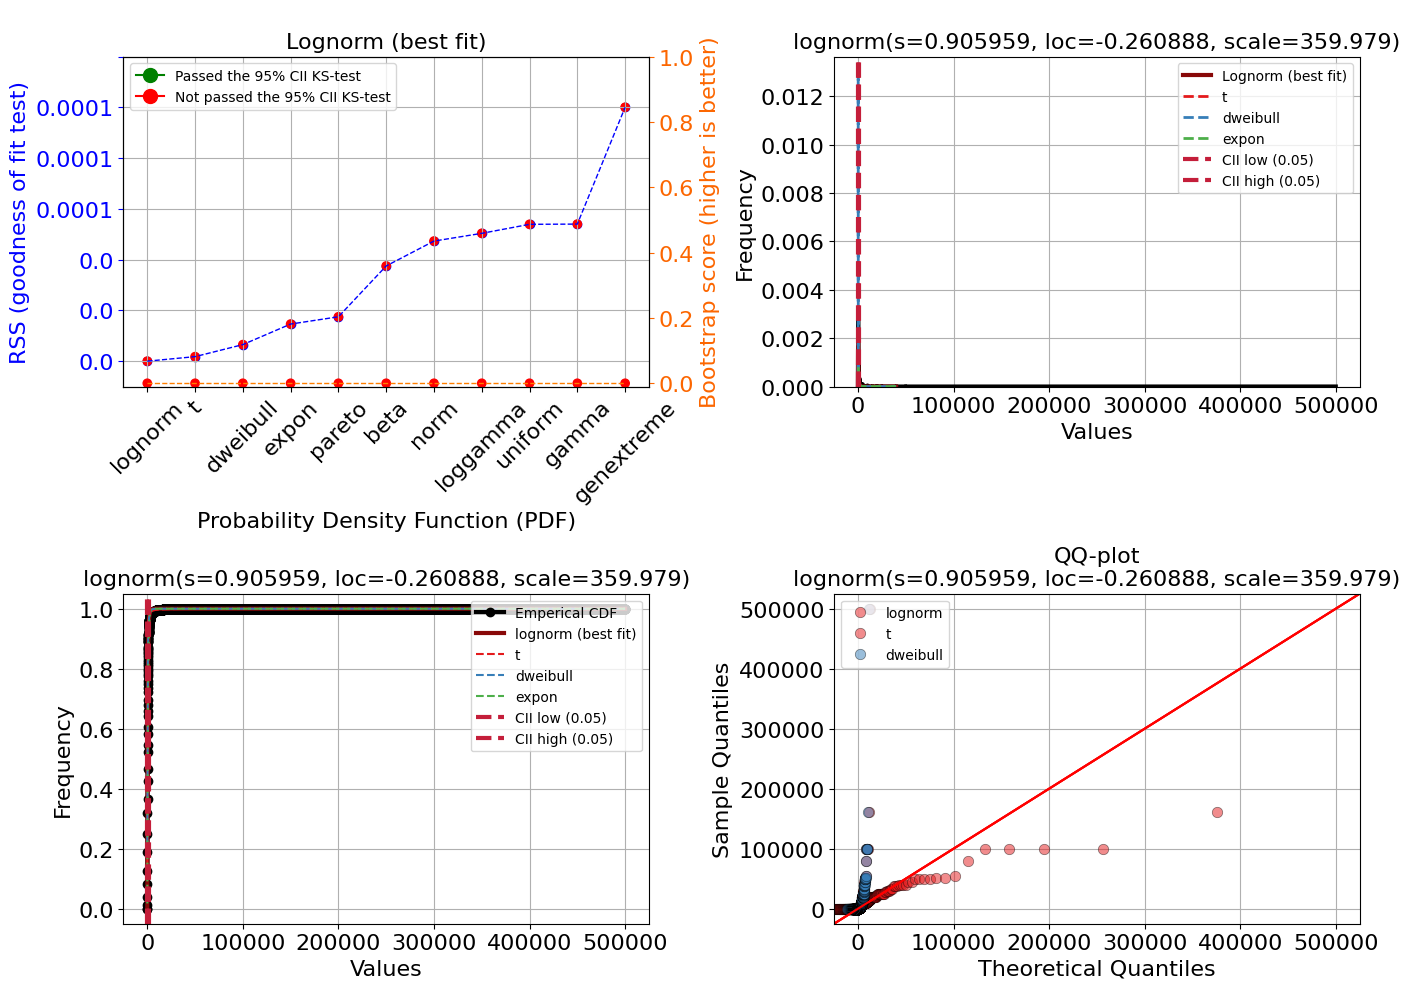

In [5]:
dfit = distfit(alpha=.05, distr='popular', random_state = 75, verbose = False)
dfit.fit_transform(df_sumarizacao['price'], verbose = False)
dfit.bootstrap(
    X = df_sumarizacao['price'], 
    n_boots=100, 
    alpha=0.05,
    n=10_000,
    n_top=3, 
    update_model=True
)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
dfit.plot_summary(ax=axs[0, 0])
dfit.plot(chart='pdf', n_top=3, ax=axs[0, 1])
dfit.plot(chart='cdf', n_top=3, ax=axs[1, 0])
dfit.qqplot(df_sumarizacao['price'], n_top=3, ax=axs[1, 1])
plt.tight_layout()

## 3. Análise multivariada